In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import softmax

from disp import set_plot, colors
from kernels import make_psi_rand_lin, make_psi_rand_sgm, make_psi_rand_sgm_bias, make_psi_rand_tanh_k_wta

In [2]:
D = 2
RX = np.linspace(-2, 2, 41)
X_STARS = np.array([
    # main text
    [np.cos(9*np.pi/16), np.sin(9*np.pi/16)],
    # supp
    [np.cos(np.pi/4), np.sin(np.pi/4)],
    [-1, 0],
    [1.5*np.cos(-np.pi/6), 1.5*np.sin(-np.pi/6)],
    [.8*np.cos(-np.pi/6), .8*np.sin(-np.pi/6)],
    ])

def make_ker_mats(ker):
    k_mats = []

    for x_star in X_STARS:
        k_mat = np.nan*np.eye(len(RX))
        for cx_0 in range(len(RX)):
            for cx_1 in range(len(RX)):
                x_test = np.array([RX[cx_0], RX[cx_1]])
                k_mat[cx_0, cx_1] = ker(x_star, x_test)

        k_mats.append(k_mat)
        
    return k_mats

$k(\mathbf{x}^*, \mathbf{x}) = \boldsymbol{\psi}(\mathbf{x}^*)^T\boldsymbol{\psi}(\mathbf{x})$

## Different $\boldsymbol{\psi}$

For each $\psi$ we use employ a random network $J_{\psi}$ with $(J_{\psi})_{id} \sim \mathcal{N}(0, g^2)$.

The Rand-Sig-Bias kernel uses $b_i \sim \mathcal{N}(0, g_{bias}^2)$.

### Kernels

RAND-LIN: 
$\boldsymbol{\psi}(\mathbf{x}) = J_{\psi}\mathbf{x}/\sqrt{N}$

RAND-SIG:
$\boldsymbol{\psi}(\mathbf{x}) = \left(1+\tanh(J_{\psi}\mathbf{x})\right)/2\sqrt{N}$

RAND-SIG-BIAS:
$\boldsymbol{\psi}(\mathbf{x}) = \left(1+\tanh(J_{\psi}\mathbf{x}) + \mathbf{b} \right)/2\sqrt{N}$

RAND-TANH-KWTA:
$\boldsymbol{\psi}(\mathbf{x}) = \text{K-WTA}(\tanh(J_{\psi}\mathbf{x}))/\sqrt{K}$

In [3]:
N = 2000

### RAND-LIN

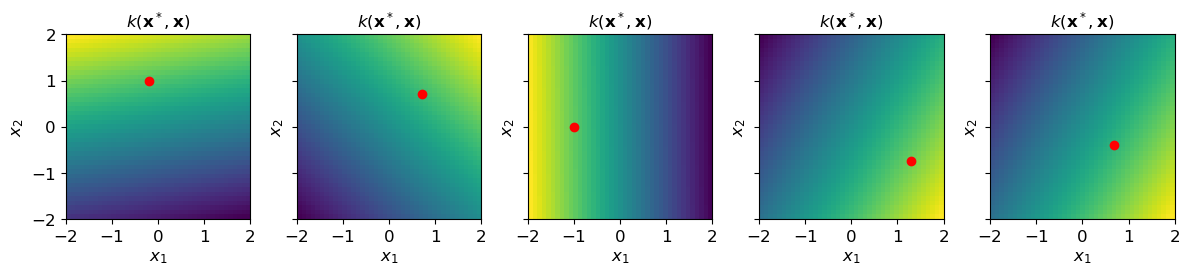

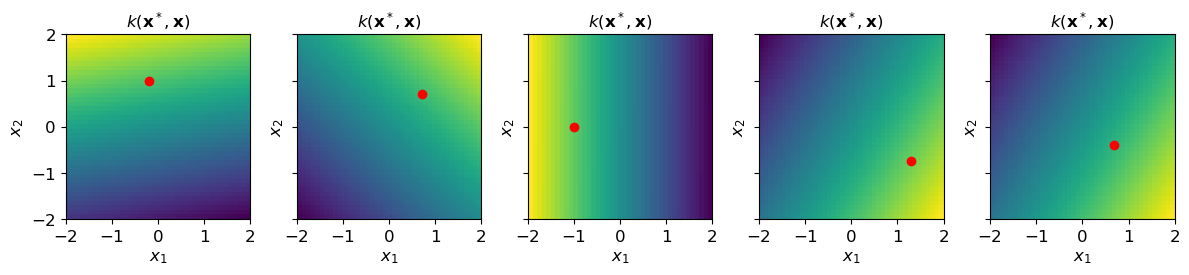

In [4]:
GS = [1, 10]

for G in GS:
    J_PSI = G*np.random.randn(N, D)
    
    psi, ker = make_psi_rand_lin(J_PSI)
    
    k_mats = make_ker_mats(ker)
    
    fig, axs = plt.subplots(1, 5, figsize=(12, 3), tight_layout=True, sharex=True, sharey=True)
    for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
        ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
        ax.scatter(*x_star, c='r')
        ax.xaxis.tick_bottom()
        set_plot(ax, x_label=r'$x_1$', y_label=r'$x_2$', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
    fig.savefig(f'ms/2_psi_rand_lin_{G}.svg')

### RAND-SIG

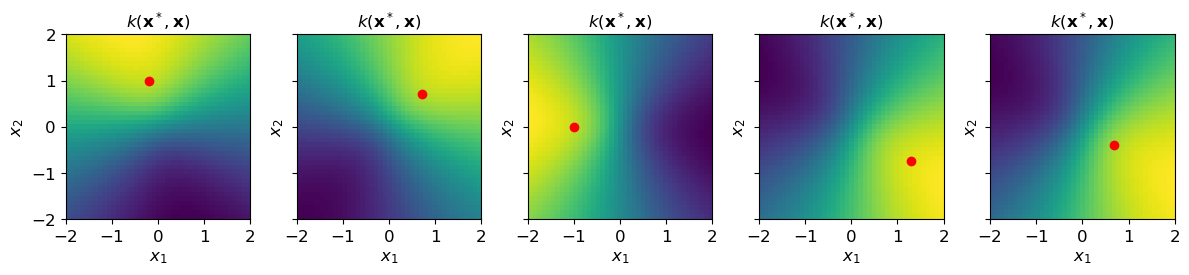

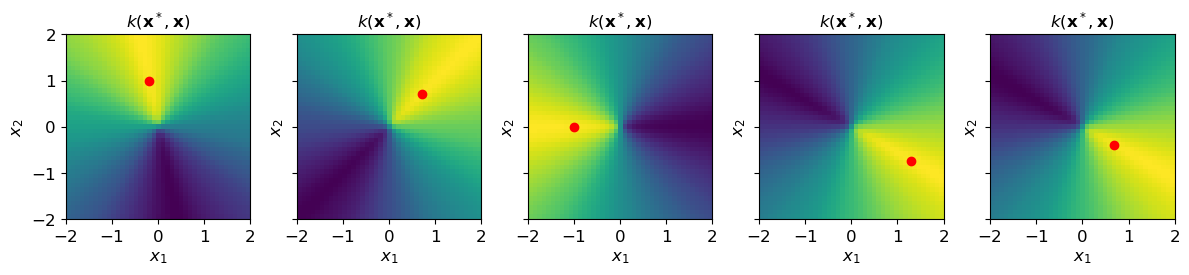

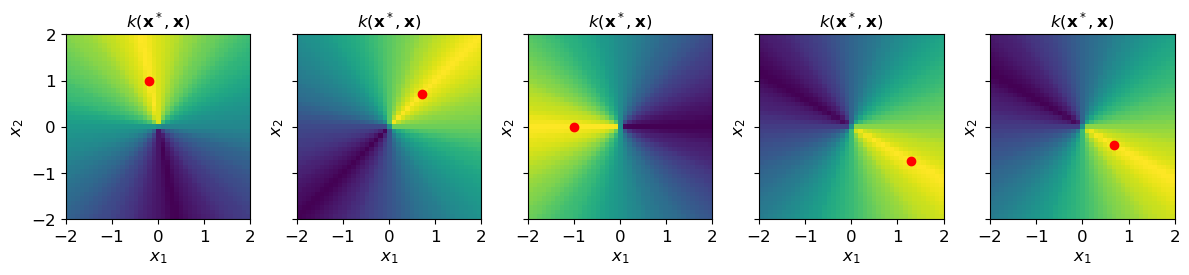

In [5]:
GS = [1, 10, 100]

for G in GS:
    J_PSI = G*np.random.randn(N, D)
    
    psi, ker = make_psi_rand_sgm(J_PSI)
    
    k_mats = make_ker_mats(ker)
    
    fig, axs = plt.subplots(1, 5, figsize=(12, 3), tight_layout=True, sharex=True, sharey=True)
    for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
        ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
        ax.scatter(*x_star, c='r')
        ax.xaxis.tick_bottom()
        set_plot(ax, x_label=r'$x_1$', y_label=r'$x_2$', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
        
    fig.savefig(f'ms/2_psi_rand_sigmoid_g_{G}.svg')

### RAND-TANH-KWTA

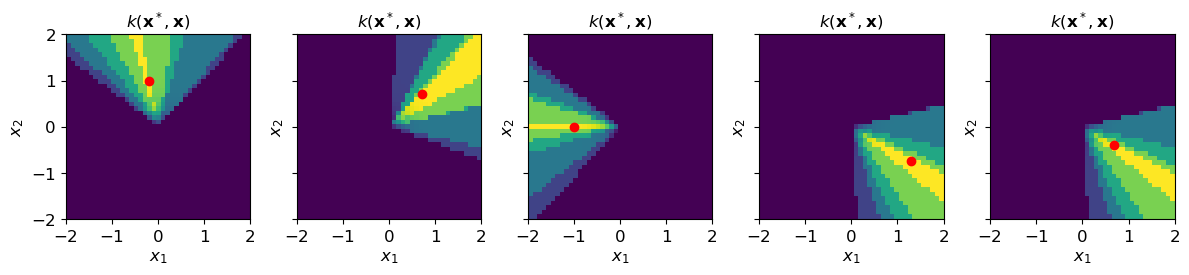

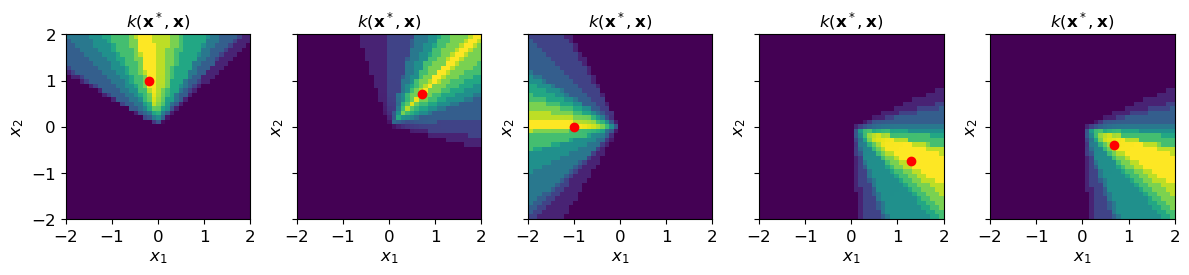

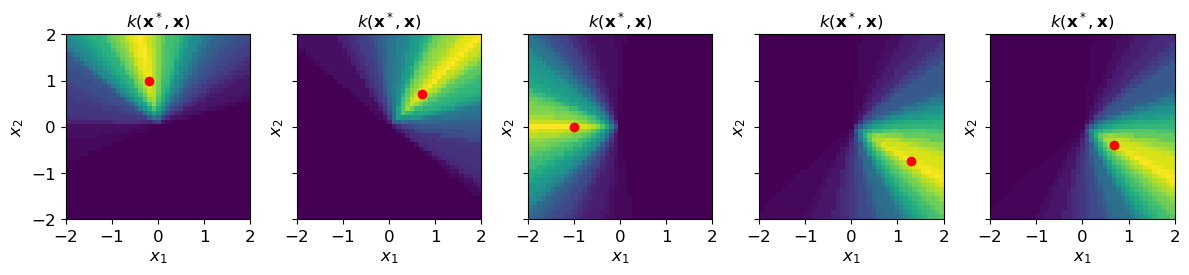

In [6]:
N = 2000
GS = [1, 1, 1]
KS = [5, 10, 50]

for G, K in zip(GS, KS):
    J_PSI = G*np.random.randn(N, D)
    
    psi, ker = make_psi_rand_tanh_k_wta(J_PSI, K)
    
    k_mats = make_ker_mats(ker)
    
    fig, axs = plt.subplots(1, 5, figsize=(12, 3), tight_layout=True, sharex=True, sharey=True)
    for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
        ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
        ax.scatter(*x_star, c='r')
        ax.xaxis.tick_bottom()
        set_plot(ax, x_label=r'$x_1$', y_label=r'$x_2$', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
        
    fig.savefig(f'ms/2_psi_rand_tanh_kwta_g_{G}_k_{K}.svg')

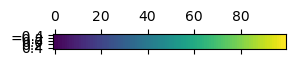

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(3, .2))
ax.matshow(np.arange(100)[None, :])
ax.set_aspect('auto')

fig.savefig('ms/2_kernel_cbar.svg')

# Other kernels

### RAND-SIG-BIAS

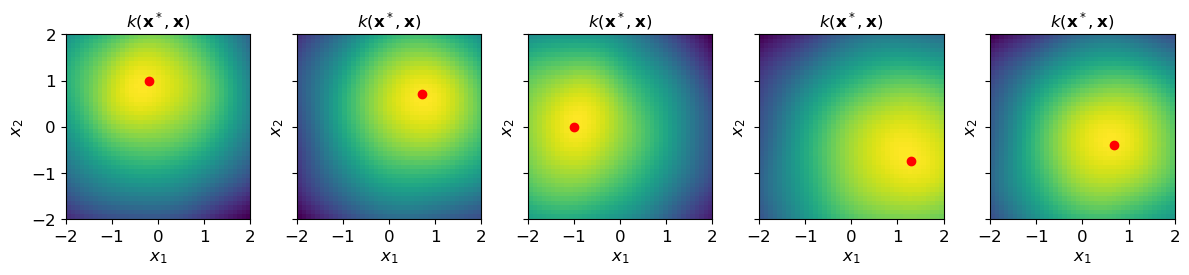

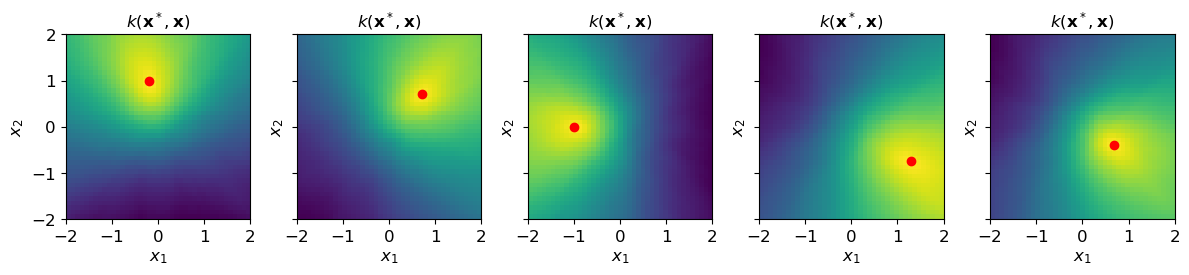

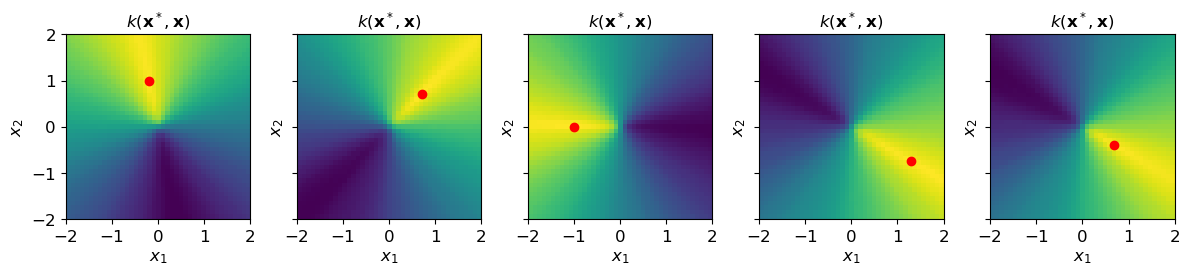

In [8]:
GS = [1, 10, 100]
G_BIAS = 10

for G in GS:
    J_PSI = G*np.random.randn(N, D)
    BIAS = G_BIAS*np.random.randn(N)
    
    psi, ker = make_psi_rand_sgm_bias(J_PSI, BIAS)
    
    k_mats = make_ker_mats(ker)
    
    fig, axs = plt.subplots(1, 5, figsize=(12, 3), tight_layout=True, sharex=True, sharey=True)
    for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
        ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
        ax.scatter(*x_star, c='r')
        ax.xaxis.tick_bottom()
        set_plot(ax, x_label=r'$x_1$', y_label=r'$x_2$', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
        
    fig.savefig(f'ms/2_psi_rand_sigmoid_bias_g_{G}_g_bias_{G_BIAS}.svg')

### BLOCK-RAND-SIG

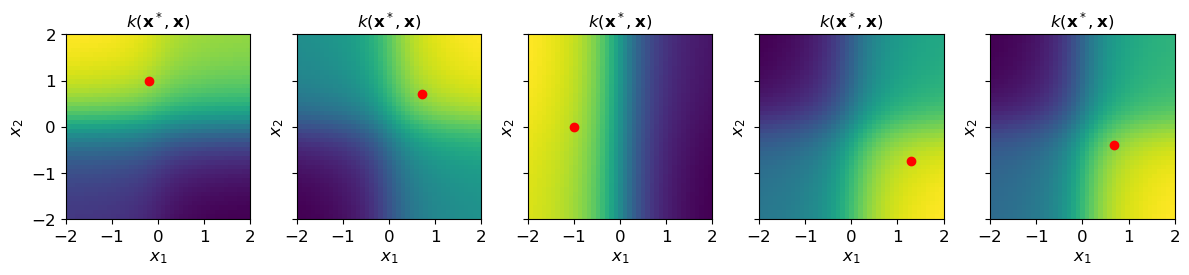

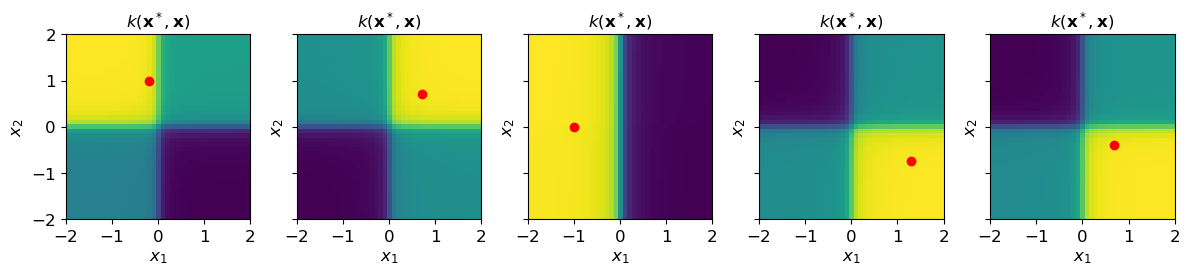

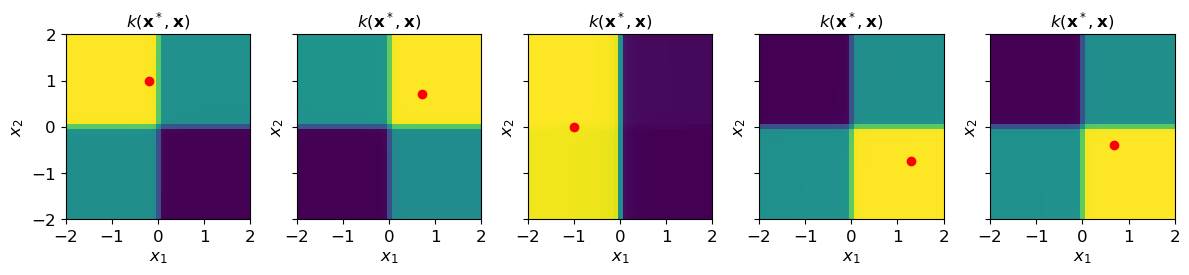

In [9]:
GS = [1, 10, 100]

for G in GS:
    J_PSI = G*np.random.randn(N, D)
    J_PSI[N//2:, 0] = 0
    J_PSI[:N//2, 1] = 0
    
    psi, ker = make_psi_rand_sgm(J_PSI)
    
    k_mats = make_ker_mats(ker)
    
    fig, axs = plt.subplots(1, 5, figsize=(12, 3), tight_layout=True, sharex=True, sharey=True)
    for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
        ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
        ax.scatter(*x_star, c='r')
        ax.xaxis.tick_bottom()
        set_plot(ax, x_label=r'$x_1$', y_label=r'$x_2$', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
        
    fig.savefig(f'ms/2_psi_block_rand_sigmoid_g_{G}.svg')